In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [82]:
from collections import Counter
from scipy.stats import chisquare, entropy

def is_uniformly_distributed(numbers):
    expected_frequency = len(numbers) / len(set(numbers))
    observed_frequency, _ = np.histogram(numbers, bins=len(set(numbers)))
    return chisquare(observed_frequency, f_exp=expected_frequency)


def shannon_entropy(data):
    counts = Counter(data)
    probabilities = [count / len(data) for count in counts.values()]
    return entropy(probabilities, base=2)


def plot_hist(function):
    lcg_timing = timing[timing['Function'] == function]
    plt.figure(figsize=(8, 7))
    plt.plot(lcg_timing['n'], lcg_timing['Time'], marker='o', linestyle='-')
    plt.title(function)
    plt.xlabel('Количество элементов')
    plt.ylabel('Время (наносек.)')
    plt.xscale('log')
    plt.grid(True)
    plt.show()
    print(f"Минимальное время: {min(lcg_timing['Time'])} наносек.")
    print(f"Максимальное время: {max(lcg_timing['Time'])} наносек.")

In [80]:
timing = pd.read_csv('timing_results.csv')
timing.head()

,n,Function,Time
0,100,LCG,565
1,100,MersenneTwister,7954
2,100,Xorshift,899
3,100,RDRand,732
4,1000,LCG,5607


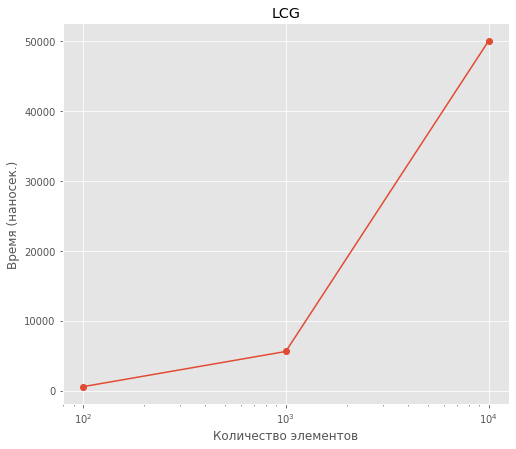

Минимальное время: 565 наносек.
Максимальное время: 50073 наносек.


In [83]:
plot_hist('LCG')

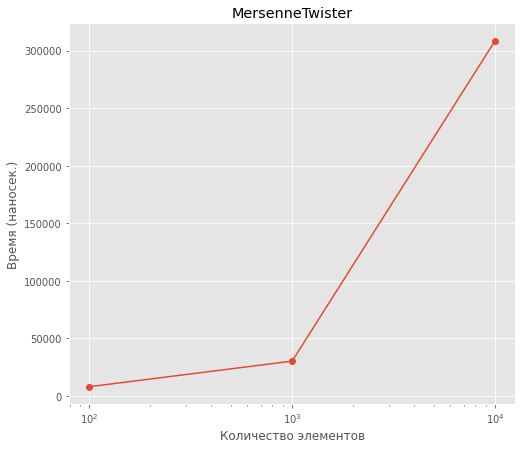

Минимальное время: 7954 наносек.
Максимальное время: 308673 наносек.


In [84]:
plot_hist('MersenneTwister')

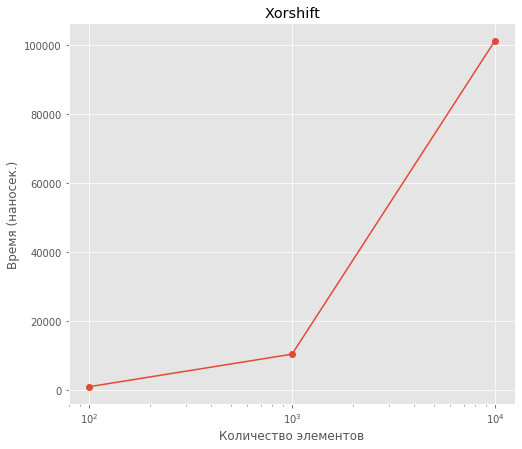

Минимальное время: 899 наносек.
Максимальное время: 101325 наносек.


In [85]:
plot_hist('Xorshift')

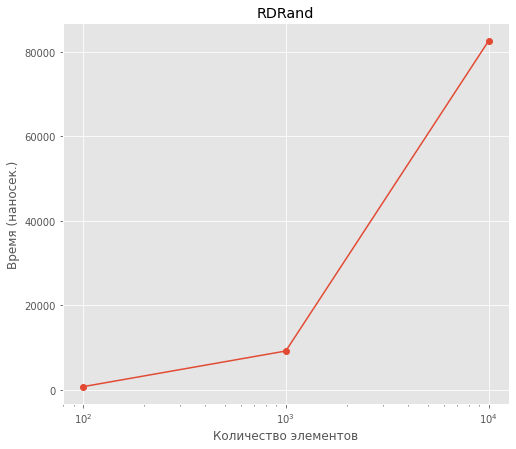

Минимальное время: 732 наносек.
Максимальное время: 82643 наносек.


In [86]:
plot_hist('RDRand')

In [57]:
def read_from_file(filename):
    numbers = []
    with open(filename, 'r') as file:
        for line in file:
            number = int(line.strip())
            numbers.append(number)
    return numbers

lcg_cpp_sample = read_from_file('lcg_sample.txt')
mtw_cpp_sample = read_from_file('mt_sample.txt')
xor_cpp_sample = read_from_file('xorshift_sample.txt')
rd_cpp_sample = read_from_file('rdrand_sample.txt')

Уникальных значений: 100000
Хи-квадрат p-value: 0.6681564409028524
Энтропия Шеннона: 16.609640474436805


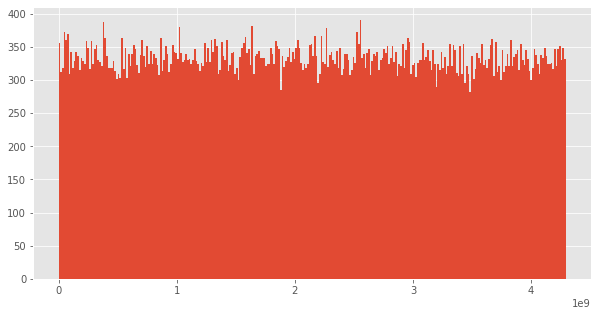

In [58]:
plt.figure(figsize=(10, 5))
plt.hist(lcg_cpp_sample, bins=300)
_, p_value = is_uniformly_distributed(lcg_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(lcg_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(lcg_cpp_sample)}')

Уникальных значений: 99999
Хи-квадрат p-value: 0.4092432560207141
Энтропия Шеннона: 16.609620474436806


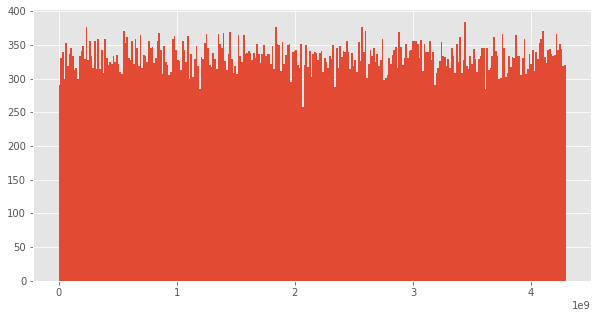

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(mtw_cpp_sample, bins=300)
_, p_value = is_uniformly_distributed(mtw_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(mtw_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(mtw_cpp_sample)}')

In [68]:
Counter(mtw_cpp_sample).most_common()[:2]

[(2101740490, 2), (3992670690, 1)]

Уникальных значений: 100000
Хи-квадрат p-value: 0.1049951244232371
Энтропия Шеннона: 16.609640474436805


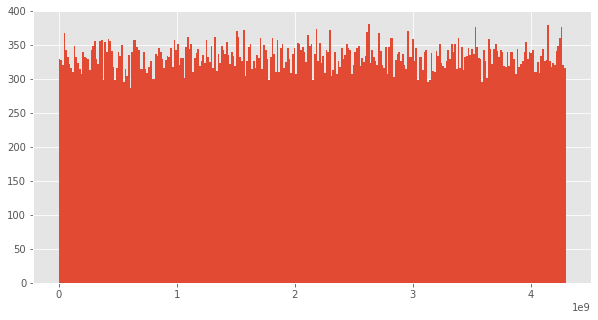

In [60]:
plt.figure(figsize=(10, 5))
plt.hist(xor_cpp_sample, bins=300)
_, p_value = is_uniformly_distributed(xor_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(xor_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(xor_cpp_sample)}')

Уникальных значений: 99999
Хи-квадрат p-value: 0.751419543020635
Энтропия Шеннона: 16.609620474436806


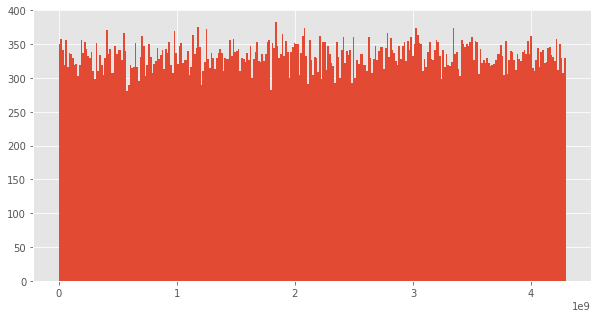

In [61]:
plt.figure(figsize=(10, 5))
plt.hist(rd_cpp_sample, bins=300)
_, p_value = is_uniformly_distributed(rd_cpp_sample)
print(f'Уникальных значений: {len(np.unique(np.array(rd_cpp_sample)))}')
print(f'Хи-квадрат p-value: {p_value}')
print(f'Энтропия Шеннона: {shannon_entropy(rd_cpp_sample)}')

In [69]:
Counter(rd_cpp_sample).most_common()[:2]

[(1214282749, 2), (603579072, 1)]